### Risk-neutral pricing of call-options using price simulations

Options are a form of financial derivative that pays off a premium $ S_T - K $ if $ S_T > K $ otherwise zero. $K$ is called the strike price. At time-0 you are given the right (but not the obligation) to buy the stock to price $K$ at time-T. If $S_T > K$, buy the stock for price $K$ and imidiatly sell it for price $S_T$ and make $S_T - K$ profit, if not, don't use your option. 

For this to be a fair game, the call-option buyer needs to pay a premium at time-0 to have this option at time-T. What is this premium?

Let total maturity be $\tau = T\Delta t$.

---

$ 
\textbf{(1) Objects / shapes}
$

- $S \in \mathbb{R}^{N\times (T+1)}$ : simulated price matrix (each row is a path).  
  - Terminal prices (column $i$): $ S_{i,T} \in \mathbb{R}^N$.

- Payoff vector (European call, strike $K$):  
  $ 
  C^{\text{pay}} \in \mathbb{R}^N,\qquad C^{\text{pay}}_i=\max(S_{i,T}-K,\,0).
  $


- Estimator (Monte–Carlo price):
  $
  \hat C_0 = \frac{1}{N}\mathbf{1}^\top e^{-r\tau} C^{\text{pay}} = \frac{1}{N}\sum_{i=1}^N e^{-r\tau}\max(S_{i, T}-K,0).
  $
  (Here $\mathbf{1}\in\mathbb{R}^N$ is the all-ones vector.)

- Sample standard error using sample variance $\widehat{\sigma}^2 = \frac{1}{N-1}\sum_{i=1}^{N}(\tilde C_i-\hat C_0)^2 $

---

$ 
\textbf{(2) Risk-neutral pricing principle}
$

- Under the risk-neutral probability measure $\mathbb{P}$ the discounted price process is a martingale. The risk-neutral pricing formula for an arbitrary payoff $H(S_T)$ is:
  $
  C_0 = e^{-r\tau}\,\mathbb{E}^{\mathbb{P}}[H(S_T)].
  $

---

$ 
\textbf{(3) One-step binomial (two-state) example — algebraic pricing}
$

- Single-step factors: up factor $u$, down factor $d$, $S_u$ and $S_d$. Maturity $\tau$ (one step).  

- Risk-neutral price:
  $
  S_0 = e^{-r\tau}\,\mathbb{E}^{\mathbb{P}}[S_T] = e^{-r\tau}\left(p S_u + (1-p) S_d\right).
  $

- Risk-neutral probability $p$:
  $
  p = \frac{S_0e^{r\tau}-S_d}{S_u-S_d}.
  $

- For a call with terminal payoffs $C_u=\max(S_u-K,0)$ and $C_d=\max(S_d-K,0)$:
  $
  C_0 = e^{-r\tau}\left(p C_u + (1-p) C_d\right).
  $

This shows equivalence of (i) replication pricing and (ii) risk-neutral expectation.




In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import statsmodels.api as sm

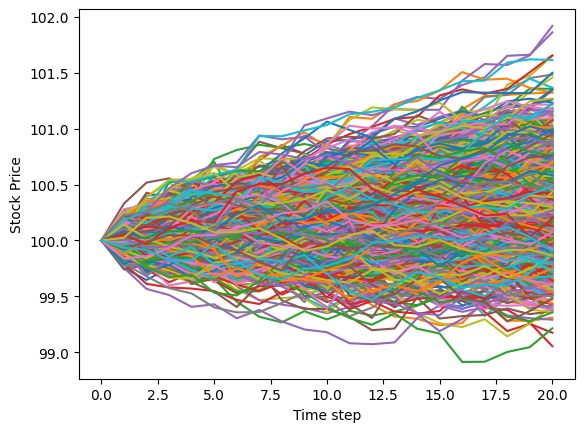

Call option price: 0.38 +- 0.01


In [2]:
# Parameters
r = 0.0425
sd = 0.015
T = 20  # number of time steps
N = 1000
dt = 1/255
t = np.arange(T+1)
S_0 = 100
K=100

w = np.random.normal(0, 1, size=(N, T))

S_t = np.zeros((N,T+1))
S_t[:,0] = S_0
C_0 = np.zeros(N)

for i in range(N):
    S_t[i,1:] = S_0*np.exp(np.cumsum((r - 0.5 * (sd**2))*dt + sd*np.sqrt(dt)*w[i,:]))
    C_0[i] = np.exp(-r*T*dt)*max(S_t[i,T] - K, 0)

for i in range(N):
    plt.plot(t, S_t[i])
plt.xlabel("Time step")
plt.ylabel("Stock Price")
plt.show()

print(f"Call option price: {round(1/N*np.sum(C_0), 2)} +- {round(np.sqrt(1/(N-1)*np.var(C_0)), 2)}")

# Black-Scholes Formula for European Call Option

We aim to compute the theoretical price of a European call option.

---

## 1. Black-Scholes Model Assumptions

Let the stock price $S_t$ follow a **Geometric Brownian Motion (GBM)** under the risk-neutral measure:

$
dS_t = r S_t dt + \sigma S_t dW_t
$

where:
- $r$ = risk-free interest rate (continuously compounded)
- $\sigma$ = volatility of the stock
- $W_t$ = standard Wiener process
- $S_0$ = current stock price

The option is **European**, with maturity $T$ and strike $K$.

---

## 2. Black-Scholes Partial Differential Equation

The price of the option $C(S,t)$ satisfies the PDE:

$
\frac{\partial C}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 C}{\partial S^2} + r S \frac{\partial C}{\partial S} - r C = 0
$

with boundary condition at maturity:

$
C(S,T) = \max(S_T - K, 0)
$

---

## 3. Black-Scholes Analytical Solution

The **closed-form solution** for a European call is:

$
C_0 = S_0 N(d_1) - K e^{-rT} N(d_2)
$

where:

$
d_1 = \frac{\ln(S_0/K) + \left(r + \frac{\sigma^2}{2}\right) T}{\sigma \sqrt{T}}, 
\quad
d_2 = d_1 - \sigma \sqrt{T}
$

and $N(\cdot)$ is the **cumulative distribution function (CDF)** of the standard normal distribution.

---

## 4. Connection to Monte Carlo Simulations

Alternatively, the **risk-neutral price** can be approximated as:

$
C_0 \approx e^{-rT} \mathbb{E}^{\mathbb{Q}} \big[ \max(S_T - K, 0) \big]
$

where $S_T$ is simulated under the **risk-neutral drift**:

$
S_{t+1} = S_t \exp\left( \left(r - \frac{1}{2}\sigma^2\right) \Delta t + \sigma \sqrt{\Delta t}\, Z_t \right)
$

with $Z_t \sim N(0,1)$ i.i.d. and $\Delta t = 1/255$ for daily steps.

---

## 5. Parameters Example

Using the given parameters:

- Risk-free rate: $r = 0.0425$
- Volatility: $\sigma = 0.015$
- Maturity: $T = 20$ days, i.e., $T_{\text{years}} = \frac{20}{255}$
- Current stock price: $S_0 = 100$
- Strike price: $K = 100$

The Black-Scholes formula for a European call option gives:

$
C_0 = S_0 \, N(d_1) - K \, e^{-r T_{\text{years}}} \, N(d_2)
$
where

$
d_1 = \frac{\ln(S_0/K) + \left(r + \frac{\sigma^2}{2}\right) T_{\text{years}}}{\sigma \sqrt{T_{\text{years}}}}, \quad
d_2 = d_1 - \sigma \sqrt{T_{\text{years}}}
$
and $N(\cdot)$ is the cumulative distribution function of the standard normal distribution.


In [3]:
S0 = 100        # Current stock price
K = 100         # Strike price
r = 0.0425      # Risk-free rate
sigma = 0.015   # Volatility
T_days = 20     # Time to maturity in days
T = T_days / 255  # Convert to years assuming 255 trading days

# Black-Scholes d1 and d2
d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Call option price
C0 = S0 * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)
C0

0.38377217667218133

### Why use Monte Carlo if you can just use the analytical formula?

# Black-Scholes PDE for a Log-Mean-Reverting SDE

## 1. SDE for the Underlying

Consider the asset price $S_t$ following a **log-mean-reverting process**:

$
dS_t = \kappa (\mu - \ln S_t) S_t \, dt + \sigma S_t \, dW_t
$

where:

- $\kappa > 0$ is the speed of mean reversion,
- $\mu$ is the long-term mean of $\ln S_t$,
- $\sigma$ is volatility,
- $W_t$ is a standard Wiener process.

---

## 2. Option Value Function

Let $V(S,t)$ be the price of a European derivative on $S_t$.  
By **Itô's lemma**:

$
dV = \frac{\partial V}{\partial t} dt + \frac{\partial V}{\partial S} dS + \frac{1}{2} \frac{\partial^2 V}{\partial S^2} (dS)^2
$

Substitute $dS$ from the SDE:

$
\begin{aligned}
dV &= \frac{\partial V}{\partial t} dt + \frac{\partial V}{\partial S} \left[ \kappa (\mu - \ln S) S \, dt + \sigma S \, dW_t \right] \\
&\quad + \frac{1}{2} \frac{\partial^2 V}{\partial S^2} (\sigma^2 S^2 dt) \\
&= \left[ \frac{\partial V}{\partial t} + \kappa (\mu - \ln S) S \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} \right] dt + \sigma S \frac{\partial V}{\partial S} dW_t
\end{aligned}
$

---

## 3. Risk-Neutral Valuation

Under **risk-neutral pricing**, the expected return of the discounted option equals the risk-free rate $r$.  
Replace the drift with the **risk-neutral drift**:

$
dS_t = \tilde{\kappa} (\tilde{\mu} - \ln S_t) S_t \, dt + \sigma S_t \, dW_t^{\mathbb{Q}}
$

- $\tilde{\mu}$ is the risk-neutral long-term log-mean,
- $\tilde{\kappa}$ can be adjusted for risk premia.

Then the option price PDE becomes:

$
\frac{\partial V}{\partial t} + \kappa (\mu - \ln S) S \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} - r V = 0
$

with terminal condition for a European call:

$
V(S,T) = \max(S_T - K, 0)
$

---

## 4. Key Differences vs GBM

| Feature | GBM | Log-Mean-Reverting |
|---------|-----|------------------|
| Drift term | $r S$ | $\kappa (\mu - \ln S) S$ |
| Volatility term | $\frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}$ | Same |
| Long-term behavior | Exponential growth | Pulls $\ln S$ toward $\mu$ |

- Analytical solutions are generally **not available**; typically use **Monte Carlo**

# Mathematical Explanation of Log-Mean-Reverting Monte Carlo Simulation

We assume the **log-price process** $X_t = \ln S_t$ follows an **Ornstein–Uhlenbeck (OU) process**:

$ dX_t = \kappa (\mu - X_t)\,dt + \sigma \, dW_t, $

where  

- $\kappa > 0$ is the speed of mean reversion,  
- $\mu$ is the long-run mean of the log-price,  
- $\sigma$ is the volatility,  
- $W_t$ is a standard Wiener process.

---

## 1. Exact Discretization of OU

For a time step $\Delta t = dt$, the OU process has the **exact solution**:

$ X_{t+\Delta t} = e^{-\kappa \Delta t} X_t + \mu \big(1 - e^{-\kappa \Delta t}\big) + \eta_t, $

with  

$ \eta_t \sim \mathcal{N}(0, \, \text{Var}[\eta_t]), $

$ \text{Var}[\eta_t] = \frac{\sigma^2}{2\kappa} \Big( 1 - e^{-2\kappa \Delta t} \Big). $

Thus, the transition law is affine in $X_t$ with Gaussian noise.

---

## 2. Monte Carlo Simulation

We generate $N$ independent paths.  
Let $Z_{i,t} \sim \mathcal{N}(0,1)$ for $i=1,\dots,N$, $t=1,\dots,T$.

Define  

$ \eta_{i,t} = \sqrt{ \frac{\sigma^2}{2\kappa} \big(1 - e^{-2\kappa \Delta t}\big) } \cdot Z_{i,t}. $

The update rule becomes:

$ X_{i,t+1} = e^{-\kappa \Delta t} \, X_{i,t} + \mu \big(1 - e^{-\kappa \Delta t}\big) + \eta_{i,t}. $

---

## 3. Matrix Form of Simulation

Define  

- $X_i = (X_{i,0}, X_{i,1}, \dots, X_{i,T})^\top \in \mathbb{R}^{T+1}$,  
- $Z_i = (Z_{i,1}, \dots, Z_{i,T})^\top \in \mathbb{R}^T$,  
- $\mathbf{1}$ as a vector of ones of length $T$.  

Then the recursion can be expressed as:

$ X_i = A X_{i,0} + B + C Z_i, $

where  

- $A$ encodes the autoregressive decay $e^{-\kappa dt}$,  
- $B$ accumulates the drift term $\mu (1 - e^{-\kappa dt})$,  
- $C$ maps Gaussian innovations $Z_i$ scaled by $\sqrt{\text{Var}[\eta]}$.  

This structure is equivalent to an **AR(1) process in matrix form**.

---

## 4. Recovering the Price Paths

Since $S_t = e^{X_t}$, we transform each path:

$ S_{i,t} = \exp(X_{i,t}), \quad i=1,\dots,N. $

Thus, $S_t$ is strictly positive and mean-reverting in logarithms.

---

## 5. European Call Option Valuation

For maturity $T$, strike $K$, and risk-free rate $r$, the **discounted payoff** along path $i$ is:

$ C_{0,i} = e^{-r T \Delta t} \, \max(S_{i,T} - K, 0). $

The Monte Carlo estimate of the call option price is:

$ \hat{C}_0 = \frac{1}{N} \sum_{i=1}^N C_{0,i}. $

The Monte Carlo standard error is:

$ \text{SE} = \frac{\hat{\sigma}_C}{\sqrt{N}}, $

where $\hat{\sigma}_C^2 = \frac{1}{N-1} \sum_{i=1}^N (C_{0,i} - \hat{C}_0)^2$.

---

## 6. Summary

- We simulate $N$ independent OU paths for $X_t = \ln S_t$.  
- Each path is updated by an affine Gaussian recursion.  
- We transform back to $S_t = e^{X_t}$ to obtain stock price paths.  
- The terminal prices yield Monte Carlo payoffs, which are discounted and averaged to estimate the option price.


In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# --- Load historical prices ---
df = pd.read_csv("FRO_historical_price.csv", sep=";")[::-1]
S = df["Close"].astype(float).values

# --- Transform to log prices ---
X = np.log(S)

# --- Build lagged dataset for AR(1) ---
X_t = X[:-1]
X_next = X[1:]

X_design = sm.add_constant(X_t)  # intercept + X_t
model = sm.OLS(X_next, X_design).fit()
alpha, beta = model.params
resid_std = np.std(model.resid, ddof=1)

# --- Step size (daily data: dt=1/255) ---
dt = 1/255

# --- Parameter recovery ---
kappa = -np.log(beta) / dt
mu = alpha / (1 - beta)
sigma = resid_std * np.sqrt(2*kappa / (1 - beta**2))

print("Estimated parameters:")
print(f"kappa  = {kappa:.4f}")
print(f"mu     = {mu:.4f}")
print(f"sigma  = {sigma:.4f}")
print(f'Last Price: {S[-1]}')

Estimated parameters:
kappa  = 7.7128
mu     = 5.2263
sigma  = 0.4657
Last Price: 206.5


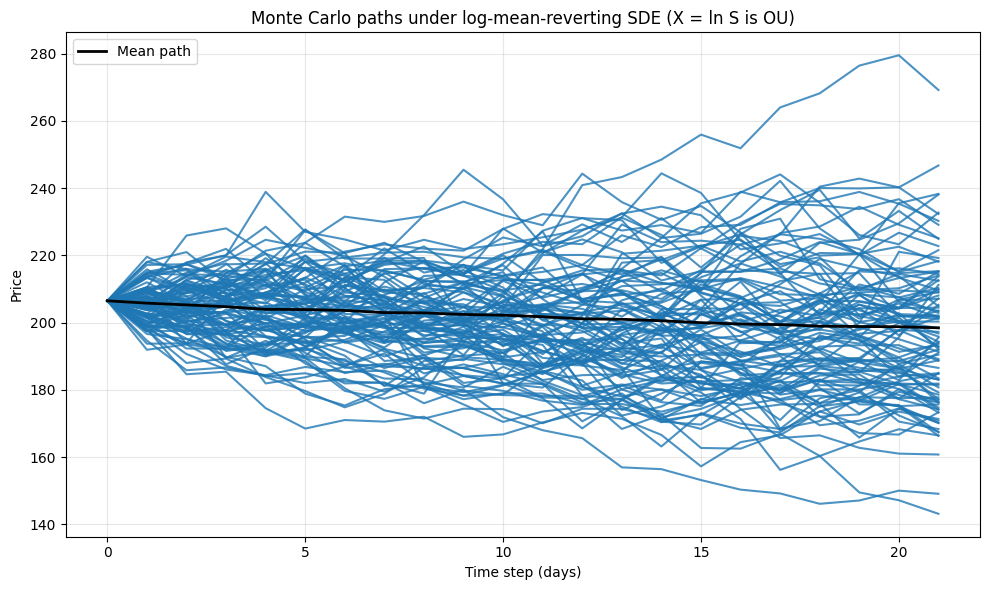

Simulated 1000 paths, T=21 steps (dt=0.003922 years)
Call option (MC) price estimate: 5.1051 ± 0.3203 (SE)
Terminal S mean: 198.4671, std: 19.8106


In [ ]:

T = 21             # number of time steps (days)
N = 1000           # number of Monte Carlo paths
dt = 1/255         # time step in years (daily)
t = np.arange(T+1)

S_0 = S[-1]        # initial price
K = 205.0      # strike (optional, for pricing)

# -------------------------------
# Precompute constants for exact OU discretization of X = ln S
# X_{t+dt} = e^{-kappa dt} X_t + mu*(1 - e^{-kappa dt}) + eta
# eta ~ N(0, var_eta), var_eta = (sigma^2 / (2*kappa)) * (1 - e^{-2 kappa dt})
# -------------------------------
exp_neg = np.exp(-kappa * dt)
var_eta = (sigma**2 / (2.0 * kappa)) * (1.0 - np.exp(-2.0 * kappa * dt))
std_eta = np.sqrt(var_eta)

# -------------------------------
# Simulate correlated normals (independent here)
# -------------------------------
Z = np.random.normal(loc=0.0, scale=1.0, size=(N, T))  # shape (N, T)

# -------------------------------
# Allocate arrays
# -------------------------------
X_t = np.zeros((N, T+1))      # log-price paths
S_t = np.zeros((N, T+1))      # price paths
X_t[:, 0] = np.log(S_0)       # initial log-price
S_t[:, 0] = S_0

# -------------------------------
# Time-stepping (exact OU update for log-price)
# -------------------------------
for step in range(T):
    # eta_t for all paths at this step
    eta = std_eta * Z[:, step]
    X_t[:, step + 1] = exp_neg * X_t[:, step] + mu * (1.0 - exp_neg) + eta
    S_t[:, step + 1] = np.exp(X_t[:, step + 1])

discount = np.exp(-r * T * dt)
payoffs = np.maximum(S_t[:, -1] - K, 0.0)
C_0_paths = discount * payoffs

call_price = C_0_paths.mean()
call_se = C_0_paths.std(ddof=1) / np.sqrt(N)

# -------------------------------
# Plot sample paths
# -------------------------------
plt.figure(figsize=(10,6))
for i in range(min(100, N)):          # plot up to 100 example paths for clarity
    plt.plot(t, S_t[i, :], color="tab:blue", alpha=0.8)
plt.plot(t, S_t.mean(axis=0), color="black", linewidth=2, label="Mean path")
plt.xlabel("Time step (days)")
plt.ylabel("Price")
plt.title("Monte Carlo paths under log-mean-reverting SDE (X = ln S is OU)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# Summary output
# -------------------------------
print(f"Simulated {N} paths, T={T} steps (dt={dt:.6f} years)")
print(f"Call option (MC) price estimate: {call_price:.4f} ± {call_se:.4f} (SE)")
print(f"Terminal S mean: {S_t[:, -1].mean():.4f}, std: {S_t[:, -1].std(ddof=1):.4f}")

### Pricing the option using regular GBM hence Black-Scholes Price. 

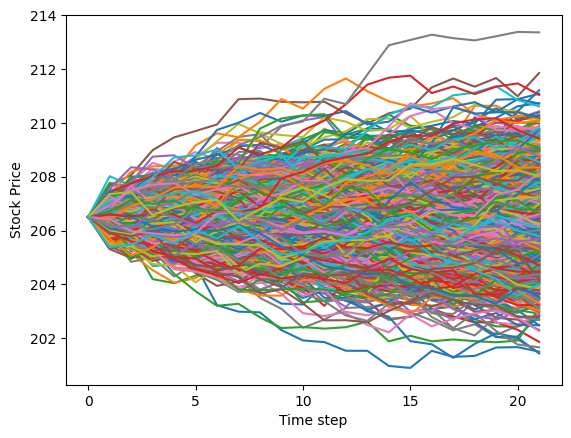

Call option price: 1.63 +- 0.05


In [25]:
# Parameters
r = 0.0425
T = 21  # number of time steps
N = 1000
dt = 1/255
t = np.arange(T+1)
S_0 = S[-1]
K=205

mu = S[1:] / S[0:-1] - 1
sd = np.std(mu, ddof=1)
mu = np.mean(mu)

w = np.random.normal(0, 1, size=(N, T))

S_t = np.zeros((N,T+1))
S_t[:,0] = S_0
C_0 = np.zeros(N)

for i in range(N):
    S_t[i,1:] = S_0*np.exp(np.cumsum((mu - 0.5 * (sd**2))*dt + sd*np.sqrt(dt)*w[i,:]))
    C_0[i] = np.exp(-r*T*dt)*max(S_t[i,T] - K, 0)

for i in range(N):
    plt.plot(t, S_t[i])
plt.xlabel("Time step")
plt.ylabel("Stock Price")
plt.show()

print(f"Call option price: {round(1/N*np.sum(C_0), 2)} +- {round(np.sqrt(1/(N-1)*np.var(C_0)), 2)}")